Working File for Group Project in Machine Learning 

# Introduction

With the increase of the world population and the increased need for food that this generates, the development of intensive cultures is always more important, the prediction of yields has become a financtial and social necessaty. However, with the development of more environmentally friendly practices and in particular the decrease in the use of pesticides, crop yields are often modified downwards. Extreme weather events such as droughts or late frosts also lead to a decrease in agricultural yields. The prediction of these yields is hard due to the high amound of uncertenty, such as droughts, pests and more. 
In our project we implemented different machine learning algorythms to tackle the difficulties of prediction.  
Such prediction could enable better management of agricultural land, and could also be an interesting tool for estimating prices, hunger, etc.

# Data

For this project we used a dataset from the FAO and the World Data Bank, containing the following information: country, year, yield, crops, rainfall, temperature and pesticides. The first step is to gather the data in one dataframe, being able to apply opearations on all the data

In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [164]:
df = pd.read_csv("data/Production_Crops_Livestock_E_All_Data.csv", encoding='latin-1') 
df2 = df
df2 = df2[df2["Area Code"]<1000] # removing the summerised Areas (Africa as a hole etc.)
df2 = df2.drop(["Area Code", "Area Code (M49)","Item Code (CPC)" ,"Item Code", "Element Code", "Element"], axis=1) # removing not used collums
df2 = df2.drop(df2.columns[df2.columns.str.endswith('F')], axis=1) # removing all collums wich say how the data was collectet. To reduce dataset complexity.
df2 = pd.melt(df2, id_vars=['Area', "Item",  "Unit"], var_name='Year', value_name='Value') # reshaping the df to create a single year collum 
df2['Year'] = df2['Year'].str[1:] # removin the letter of befor the years
df2['Year'] = df2['Year'].astype(int)
df2 = df2.rename(index=str, columns={"Value": "yield_amound"})

df2.head(10)

,Area,Item,Unit,Year,yield_amound
0,Afghanistan,"Almonds, in shell",ha,1961,NaN
1,Afghanistan,"Almonds, in shell",hg/ha,1961,NaN
2,Afghanistan,"Almonds, in shell",tonnes,1961,NaN
3,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",ha,1961,NaN
4,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",hg/ha,1961,NaN
5,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",tonnes,1961,NaN
6,Afghanistan,Apples,ha,1961,2220.0
7,Afghanistan,Apples,hg/ha,1961,68018.0
8,Afghanistan,Apples,tonnes,1961,15100.0
9,Afghanistan,Apricots,ha,1961,4820.0


In [165]:
df2.tail(10)

,Area,Item,Unit,Year,yield_amound
3737704,Zimbabwe,"Skim Milk & Buttermilk, Dry",tonnes,2021,NaN
3737705,Zimbabwe,Sugar Crops Primary,ha,2021,47000.00
3737706,Zimbabwe,Sugar Crops Primary,hg/ha,2021,734043.00
3737707,Zimbabwe,Sugar Crops Primary,tonnes,2021,3450000.00
3737708,Zimbabwe,"Treenuts, Total",ha,2021,3261.00
3737709,Zimbabwe,"Treenuts, Total",hg/ha,2021,21544.00
3737710,Zimbabwe,"Treenuts, Total",tonnes,2021,7025.62
3737711,Zimbabwe,Vegetables Primary,ha,2021,35148.00
3737712,Zimbabwe,Vegetables Primary,hg/ha,2021,66770.00
3737713,Zimbabwe,Vegetables Primary,tonnes,2021,234679.67


The first dataset contains information of the agricultural production per country and year. We keep only columns which have relevant information for us. For later it is relevant that there are a lot of differnet Products, and that the production is quantified in differend Units. The dataset ranges form 1961-2021.

In [166]:
dg = pd.read_csv("data/rain.csv", encoding='latin-1')
dg2=dg.drop(['Stop','Indicator','Code','IndicatorCode'], axis=1) 
dg2 = pd.melt(dg2, id_vars=['ï»¿Area'], var_name='Year', value_name='Value') # reshaping the df to create a single year collum 	
dg2=dg2.dropna()
dg2 = dg2.rename(index=str, columns={"Value": "rain"})
dg2 = dg2.rename(index=str, columns={"ï»¿Area": "Area"})
dg2['Year']=dg2['Year'].astype('int')


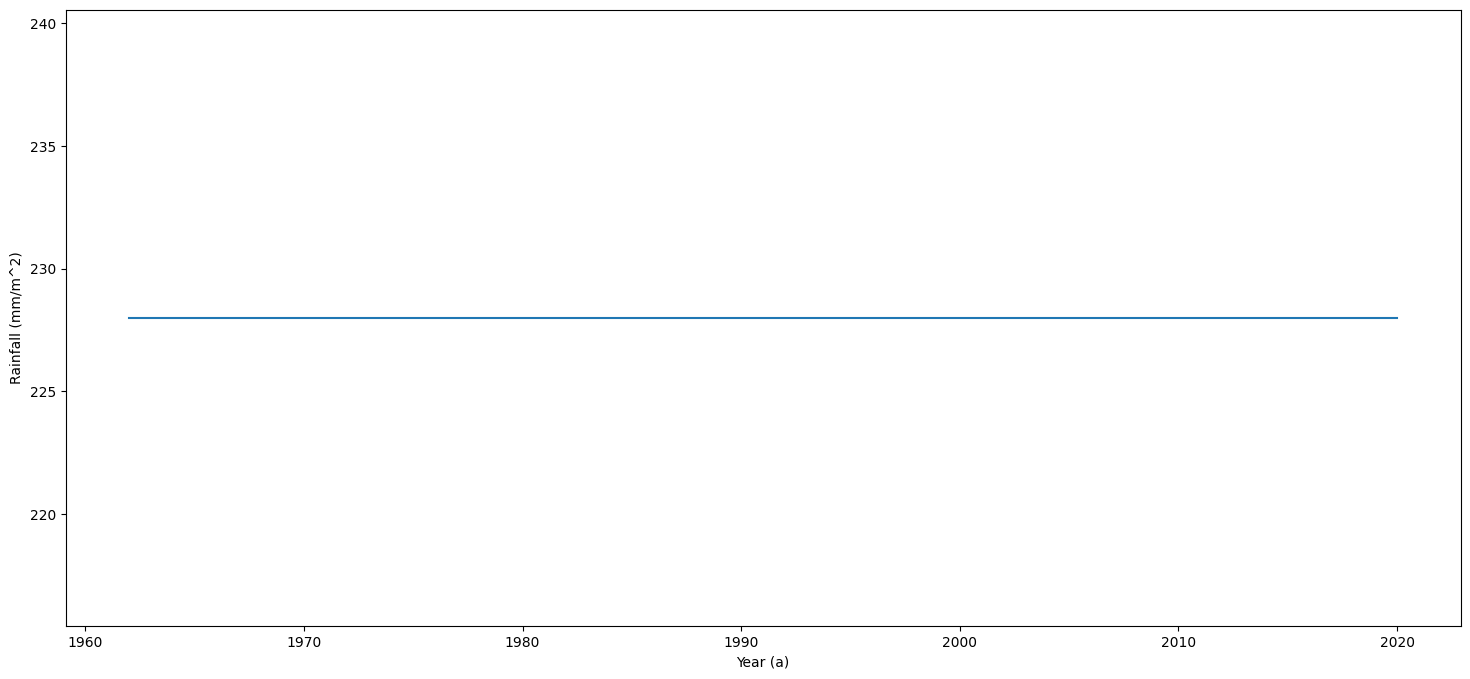

In [167]:
a = dg2[dg2["Area"] == "Iran"]
fig = sns.lineplot(data=a, x="Year", y="rain", markers=True)
plt.xlabel("Year (a)")
plt.ylabel("Rainfall (mm/m^2)")
plt.show(fig)

The secound dataset is describing the averige rainfall per square meter. Here only the relevant columns were kept. But the dataset has the problen that it has only limited meaningfullnes, due to the fact that much of the values were estimated and have the same value for most of the years, as seen above.   

In [168]:
dr = pd.read_csv("data/FAOSTAT_data_en_4-18-2023.csv", encoding='latin-1')
dr2 = dr
dr2 = dr2[dr2["Item"] == "Pesticides (total)"] #just using "Pesticides (total)" to reduce complexity
dr2 = dr2[dr2["Unit"] == "tonnes"] # just using "tonnes" to reduce complexity
dr2 = dr2.drop(["ï»¿Domain Code", "Area Code (M49)", "Item Code", "Element Code", "Year Code", "Flag", "Flag Description","Element", "Domain", "Item"], axis=1) # removing not used collums
dr2 = dr2.rename(index=str, columns={"Value": "pesticide_amound"})
dr2

,Area,Year,Unit,pesticide_amound
0,Albania,1990,tonnes,121.00
1,Albania,1991,tonnes,121.00
2,Albania,1992,tonnes,121.00
3,Albania,1993,tonnes,121.00
4,Albania,1994,tonnes,201.00
...,...,...,...,...
65752,Zimbabwe,2016,tonnes,2185.07
65753,Zimbabwe,2017,tonnes,2185.07
65754,Zimbabwe,2018,tonnes,2185.07
65755,Zimbabwe,2019,tonnes,2185.07


In the thired dataset we got information of the Pesticide use per country and year. The datlet was cleaned to only keep relevant columns. Relevant here is the timespan wich only goes from 1990 till 2020, this timespan is very much smaller that the information we have from other datasets. The includes total pesticide plus a seperation into different pesticides, such as herbicides etc.. To reduce the complexity of the proplem we use the total pesticide amounds.  

In [169]:
di = pd.read_csv("data/temp.csv", encoding='latin-1')
di2 = di.rename(index=str, columns={"year": "Year"}) # renaming collums 
di2 = di2.rename(index=str, columns={"country": "Area"}) #renaming collums 
di2 = di2.drop_duplicates(subset=['Area', "Year"], keep='last')
di2["Area"]=di2["Area"].replace(["United States", "Russia", "Bolivia"],["United States of America", "Russian Federation", "Bolivia (Plurinational State of)"]) #changing country names. 
di2

,Year,Area,avg_temp
165,1843,United Arab Emirates,26.04
166,1844,United Arab Emirates,26.26
167,1845,United Arab Emirates,NaN
168,1846,United Arab Emirates,NaN
169,1847,United Arab Emirates,NaN
...,...,...,...
71306,2009,Mexico,21.76
71307,2010,Mexico,20.90
71308,2011,Mexico,21.55
71309,2012,Mexico,21.52


The 4th dataset inclueds information about the average temperature per country. In this dataset countrys had different names, so this problem had to be fixed. The timeframe is huge in the dataset. But no relevant to us, because no of our other datasets, have such a long range. 

In [170]:
merged = pd.merge(df2, dr2, on= ["Area", "Year"], how= "outer" )
merged = pd.merge(di2, merged, on= ["Area", "Year"], how= "outer")
merged = pd.merge(dg2, merged, on= ["Area", "Year"], how= "outer")

In [171]:
merged.dtypes

Area                 object
Year                  int64
rain                float64
avg_temp            float64
Item                 object
Unit_x               object
yield_amound        float64
Unit_y               object
pesticide_amound    float64
dtype: object

The datasets are merged on year and area using the outer fit. This secures that we are not loosing important Information, but this also means that the resulting dataset is huge. In the finaldataset we have a variety of columns, wich are described in the following . "Area" is a object column with the countrys. "Year" is an integer column with timeinformation with the resultion of years. "rain" is a continios column with average rainfall in mm/ m^2. "avg_temp" is a continous column which describes the average temperature. "Item" has information about the kind of agricultural prouct stored in a object column. "yield_amound" stores the amound of yield in a continoues column with the unit described in "Unit_x", which is a object colum with units such as "ha" or "tonnes". The column "pesticide_amound" contains the values of total pesticide amounds with the Unit "tonnes", described in "Unit_y".  

In [172]:
def get_na_distribution(dataframe):
    total_na = dataframe.isna().sum()
    percentage_na = (total_na / len(dataframe)) * 100
    na_distribution = pd.concat([total_na, percentage_na], axis=1, keys=['Total NA', 'Percentage NA'])
    na_distribution = na_distribution[na_distribution['Total NA'] > 0]
    na_distribution.sort_values(by='Total NA', ascending=False, inplace=True)
    return na_distribution

get_na_distribution(merged)

,Total NA,Percentage NA
Unit_y,2198556,58.238475
pesticide_amound,2198556,58.238475
avg_temp,1689138,44.744287
rain,1132787,30.006871
yield_amound,975983,25.853224
Item,23041,0.610343
Unit_x,23041,0.610343


A big Problem of the data set are the missing values. Especially the columns containing the information about the Pesticides hav a lot of missing values. This is caused mainly from the short timeframe. But the temperature data has also much missing data. (here more information why).

In General the most machine learning models work badly with missing data. To clean the dataset, eather (here answer to NAs)

In [173]:
merged.describe()

,Year,rain,avg_temp,yield_amound,pesticide_amound
count,3.775092e+06,2.642305e+06,2.085954e+06,2.799109e+06,1.576536e+06
mean,1.990353e+03,1.142553e+03,1.719064e+01,8.248359e+05,2.198202e+04
std,1.998773e+01,7.916616e+02,7.622080e+00,9.434097e+06,6.205351e+04
min,1.743000e+03,1.810000e+01,-1.213000e+01,0.000000e+00,3.000000e-02
25%,1.975000e+03,5.890000e+02,1.011000e+01,1.670000e+03,3.139000e+02
50%,1.991000e+03,9.000000e+02,1.744000e+01,1.530500e+04,2.485120e+03
75%,2.006000e+03,1.651000e+03,2.480000e+01,1.036820e+05,1.187192e+04
max,2.021000e+03,3.240000e+03,3.073000e+01,7.685942e+08,4.345408e+05


In [174]:
2.642305e+06

2642305.0

When examining the distibution of the dataframe, it becomes clear, that some of the datacolumns are not normalised. There is a huge difference in size. While the mean of the rain data is at 

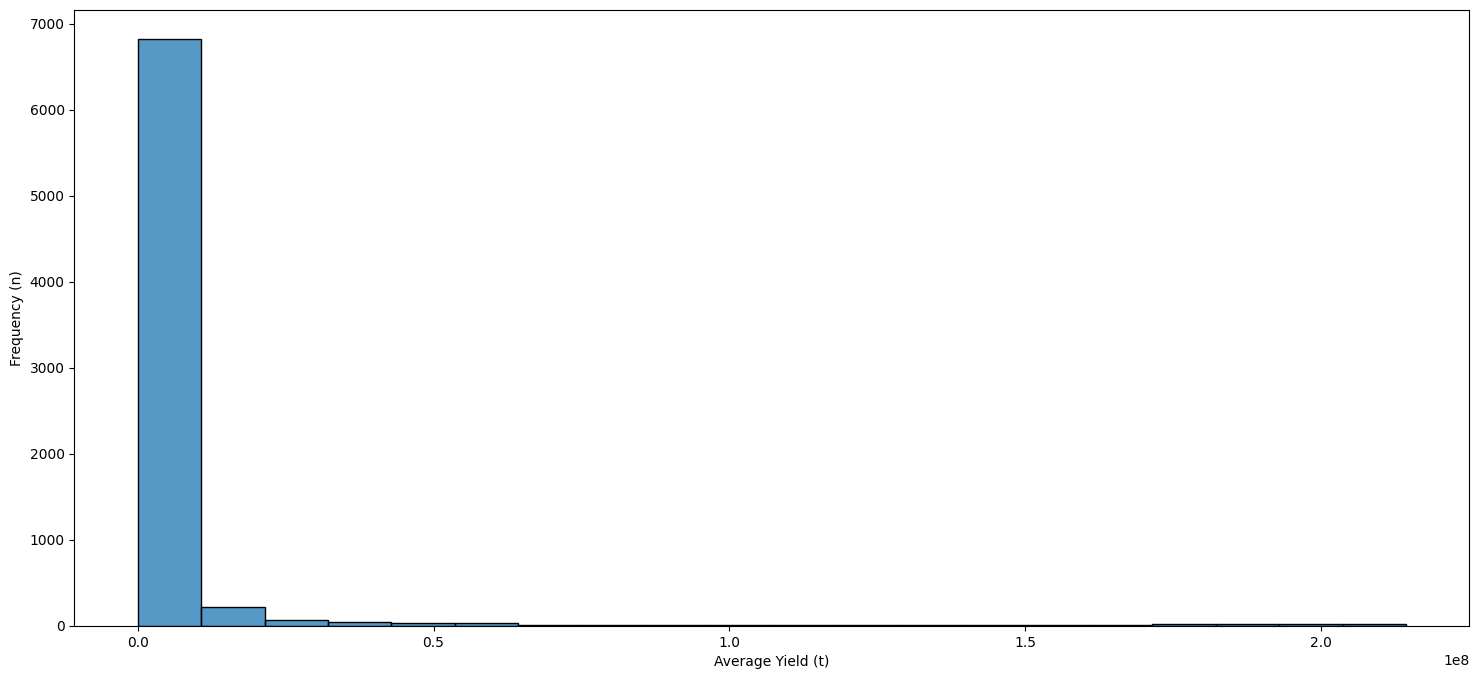

In [175]:
a = merged[merged["Unit_x"] == "tonnes"]
a = a[a["Item"] == "Rice"]
fig = sns.histplot(data = a, x= "yield_amound", bins = 20)
plt.xlabel("Average Yield (t)")
plt.ylabel("Frequency (n)")
plt.show(fig)

Espectially the yield amound has a huge variety. As shown exemplary for Rice in the graph above, the distribution is cleary more around the right side. The standart diviation is at 9.434097e+06 while the mean is only at 8.248359e+05. Depending on the algorythm used, it will be nessecary to standardise the data. 

In [176]:
# Specify the file path and name for the CSV file
csv_file_path = 'data/file.csv'

# Use the 'to_csv' function to save the dataframe as a CSV file
merged.to_csv(csv_file_path, index=False)

To avoid having the need to load and merge the dataset every time, we are writing the merged dataset in a seperate CSV file, wich is then stored in the data folder and will be loaded afterwards.   

In [177]:
data = pd.read_csv("data/file.csv", encoding='latin-1')

C:\Users\Lucas\AppData\Local\Temp\ipykernel_12104\1933639226.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/file.csv", encoding='latin-1')


# Methods 

We have the problem that our dataset is very big and not homogeneous. Our computing power is not enough to work with the entire dataset. To workaround this problem we used parts of the data to build problem specific models. Starting with the model with the smallest dataset.    

SARIMAX prediction

In [178]:
from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from pylab import rcParams

In [179]:
datas = data[data["Area"] == "Brazil"]
datas = datas[datas["Item"] == "Cereals, primary"]
datas = datas[datas["Unit_x"] == "tonnes"]
datas = datas[["Year", "yield_amound"]]
datas["Year"] = datas["Year"].astype("float")
datas = datas.drop_duplicates(subset=['yield_amound', 'Year'], keep='last')

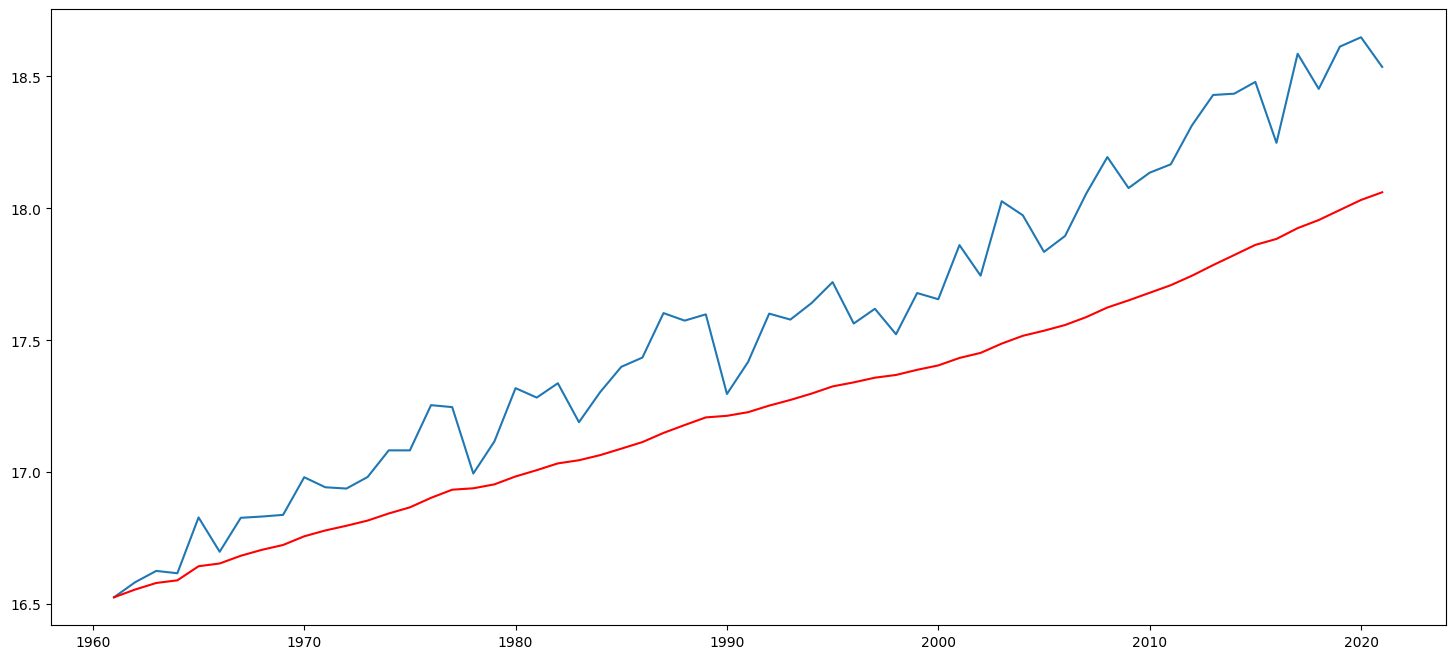

In [180]:
datas["Year"] = datas["Year"].astype("int")
dataa = datas.groupby('Year')['yield_amound'].sum().reset_index()
dataa = dataa.set_index('Year')
dataa.index = pd.to_datetime(dataa.index, format='%Y').strftime('%Y/%m/%d')
#create new DataFrame:
dataa.index = pd.to_datetime(dataa.index)
#pd.to_datetime(df['Year'], format='%Y')

y = dataa['yield_amound'].resample("YS").mean()
ts_log = np.log(y)
moving_avg = ts_log.rolling(12).mean()
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.dropna(inplace=True)
expwighted_avg = ts_log.ewm(halflife=12).mean()

plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

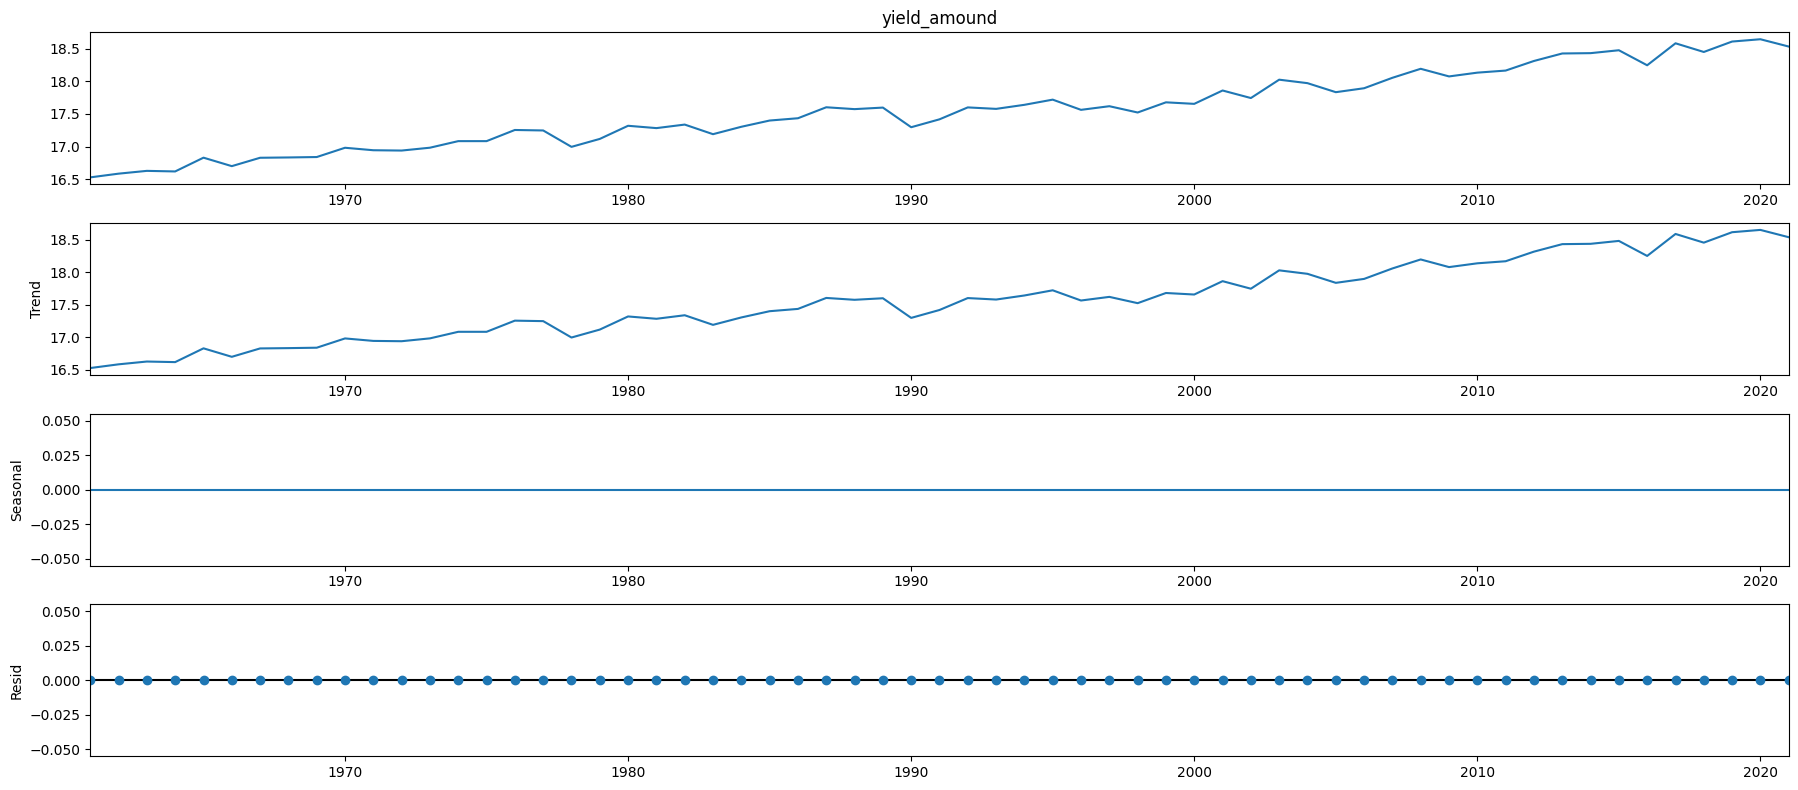

In [181]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(ts_log, model='additive', extrapolate_trend='freq')
fig = decomposition.plot()
plt.show()

In [182]:
#ts_log_diff = ts_log - ts_log.shift()
train= y[:45]
test= y[45:]

In [183]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(train,order=(1, 1, 1),seasonal_order=(1,1,5,5))

results=model.fit()
results.summary()

c:\Users\Lucas\miniconda3\envs\Pythonuse\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                            SARIMAX Results                                            
=======================================================================================================
Dep. Variable:                                    yield_amound   No. Observations:                   45
Model:             SARIMAX(1, 1, 1)x(1, 1, [1, 2, 3, 4, 5], 5)   Log Likelihood                -659.589
Date:                                         Wed, 07 Jun 2023   AIC                           1337.179
Time:                                                 19:26:27   BIC                           1352.151
Sample:                                             01-01-1961   HQIC                          1342.551
                                                  - 01-01-2005                                         
Covariance Type:                                           opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2538      0.836      0.304      0.761      -1.385       1.893
ma.L1         -0.7375      0.662     -1.113      0.266      -2.036       0.561
ar.S.L5       -0.7468      4.366     -0.171      0.864      -9.303       7.810
ma.S.L5        0.0634      5.032      0.013      0.990      -9.800       9.927
ma.S.L10      -0.6226      2.950     -0.211      0.833      -6.404       5.159
ma.S.L15       0.2617      0.976      0.268      0.789      -1.651       2.174
ma.S.L20       0.1210      1.477      0.082      0.935      -2.773       3.015
ma.S.L25      -0.2787      0.387     -0.720      0.471      -1.037       0.480
sigma2      4.544e+13   1.92e-13   2.36e+26      0.000    4.54e+13    4.54e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                20.92
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               4.00   Skew:                             0.89
Prob(H) (two-sided):                  0.02   Kurtosis:                         6.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.05e+43. Standard errors may be unstable.
"""

<Axes: xlabel='Year'>

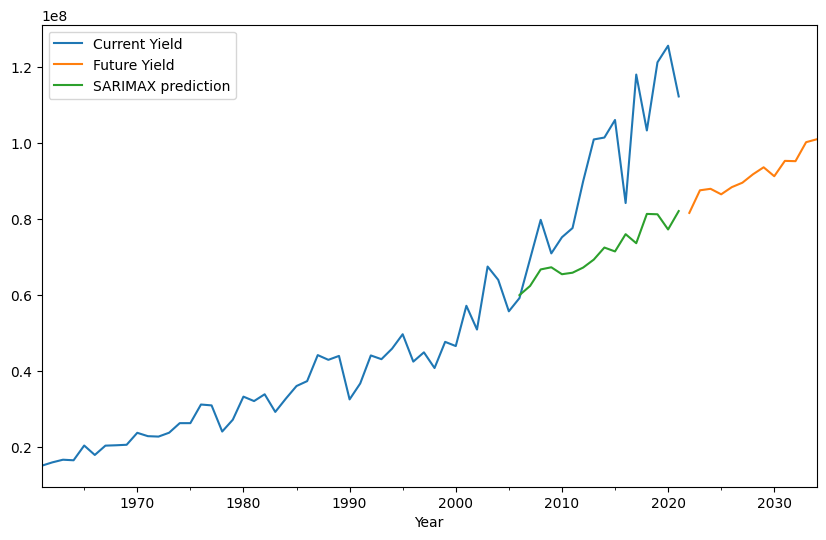

In [184]:
pre=results.predict(start= len(train), end= (len(y)-1),dynamic=True)
future_yield= results.predict(start= len(y), end=(len(y)+12))
y.plot(legend=True, label='Current Yield', figsize=(10,6))

future_yield.plot(legend= True, label='Future Yield')
pre.plot(legend=True, label='SARIMAX prediction')

 ## Whole dataset 

In [185]:
datas = data[data["Unit_x"] == "hg/ha"]
datas = datas[datas["Item"] == "Rice"]
datas = datas.drop("Unit_x", axis=1)
datas = datas.drop("Unit_y", axis= 1)
datas = datas.drop("Item", axis= 1)
#datas = datas.drop("pesticide_amound", axis=1)
datas = datas.drop_duplicates(subset= ["Area", "Year"])
datas

,Area,Year,rain,avg_temp,yield_amound,pesticide_amound
160,Afghanistan,1961,327.0,14.23,15190.0,NaN
381,Angola,1961,1010.0,23.75,11600.0,NaN
717,Albania,1961,1485.0,16.19,15514.0,NaN
1518,Australia,1961,534.0,16.86,59000.0,NaN
2175,Burundi,1961,1274.0,20.90,37641.0,NaN
...,...,...,...,...,...,...
3773290,Venezuela (Bolivarian Republic of),2021,NaN,NaN,41999.0,NaN
3773604,Viet Nam,2021,NaN,NaN,60740.0,NaN
3774243,Yugoslav SFR,2021,NaN,NaN,NaN,NaN
3774523,Zambia,2021,NaN,NaN,14893.0,NaN


First the data is collected. The used target variable is the yield in hg per ha. 

In [186]:
object_columns = datas.select_dtypes(include='object').columns
yield_df_onehot = pd.get_dummies(datas, columns=object_columns, prefix = object_columns)
yield_df_onehot = yield_df_onehot.dropna()
yield_df_onehot

,Year,rain,avg_temp,yield_amound,pesticide_amound,Area_Afghanistan,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,...,Area_Ukraine,Area_United Republic of Tanzania,Area_United States of America,Area_Uruguay,Area_Uzbekistan,Area_Venezuela (Bolivarian Republic of),Area_Viet Nam,Area_Yugoslav SFR,Area_Zambia,Area_Zimbabwe
1199780,1990,1010.0,24.12,9512.0,64.00,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1200116,1990,1485.0,16.37,23333.0,121.00,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1200710,1990,591.0,17.67,36709.0,26156.00,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1201324,1990,534.0,17.47,88000.0,17866.42,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1201981,1990,1274.0,21.15,33333.0,92.08,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2344792,2013,565.0,10.33,59938.0,86781.80,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2345106,2013,1300.0,15.92,78812.0,19028.60,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2346446,2013,495.0,14.98,26087.0,26857.00,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2346721,2013,1020.0,20.14,11617.0,3837.73,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In order to being able to work with the object coloum, we encode the Area colum with the "get_dummies" function. Because the models cant work with missing data the missing data is removed.

Linear Regression

The main way we apply models is by using the sklearn libary. In general here we follow the same structure, to make it more compareble. 

In [187]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns

First we load the used libarys.

In [188]:
X = yield_df_onehot.drop("yield_amound", axis=1)
y = yield_df_onehot['yield_amound']
scaler = StandardScaler()
X = scaler.fit_transform(X)

Then the features (X) and the target variable (y) are defined. And X is scaled. 

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

The data is then split into training and test data with a test size of 0.2.

In [190]:
model = LinearRegression()


model.fit(X_train, y_train)

LinearRegression()

In model training the model is choosen, here linear regression. Then it is fit/trained on the training data. 

In [191]:
y_pred_linear = model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
print('Mean Squared Error:', mse_linear)

Mean Squared Error: 51423056.451222934


The Mean Squared Error (mse) on it seld has no real meaning, only in comparison with other mse from other models, a decision is possible. 

<Axes: xlabel='yield_amound'>

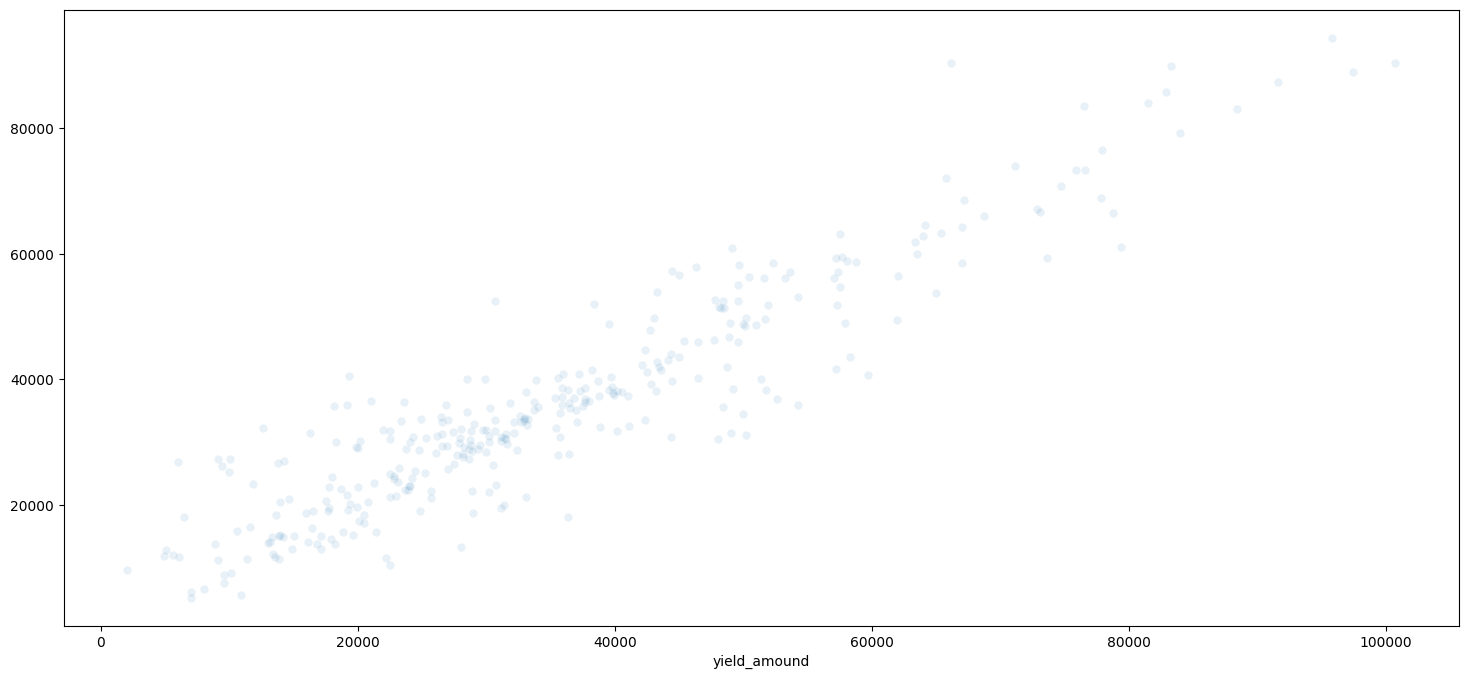

In [192]:
sns.scatterplot(x=y_test, y=y_pred_linear, alpha= 0.1)

A nice way of showing the model accuracy in ploting the predicted vs the actual values. A perfect fit would be a line in the middle. 

In model validation a number of solutions is used to get compareble results. First the model is used to predict y on the test data. Then the mean square error is calculated, based on the predicted values and the predicted values.

In the following code, using the sameframework, multible different models are tested and afterward compared. 

In [193]:
X = yield_df_onehot.drop("yield_amound", axis=1)
y = yield_df_onehot['yield_amound']
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_linear = model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)

# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_gradienboost = mean_squared_error(y_test, y_pred)

# Random Forrest Regressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred_random_forrest = model.predict(X_test)
mse_random_forrest = mean_squared_error(y_test, y_pred_random_forrest)


To further improve results ensebly was used. 

In [194]:
from sklearn import datasets, ensemble
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred_ensemble_gradient = model.predict(X_test)
mse_ensemble_gradient = mean_squared_error(y_test, y_pred_ensemble_gradient)

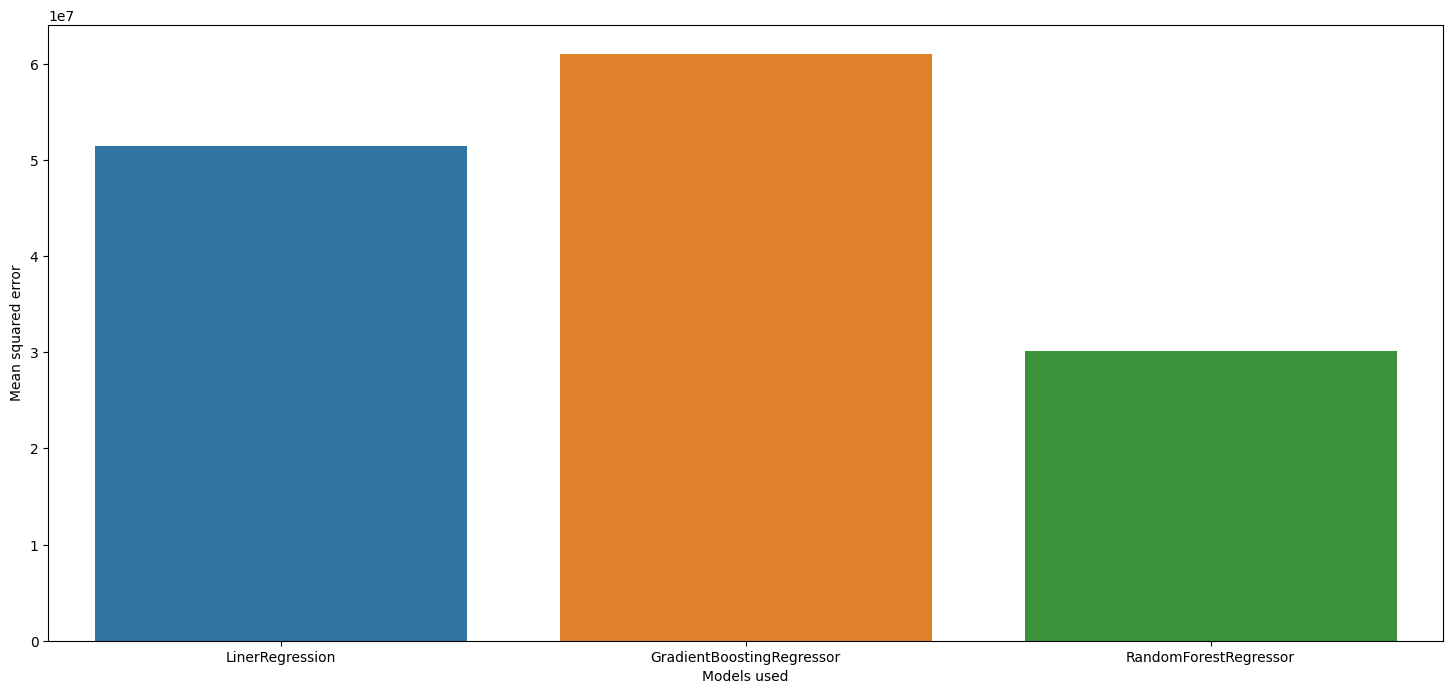

In [195]:
di = pd.DataFrame({"model_type": ["LinerRegression", "GradientBoostingRegressor", "RandomForestRegressor"], "MSE": [mse_linear,mse_gradienboost, mse_random_forrest]})
fig = sns.barplot(data = di, y= "MSE",x="model_type")
plt.xlabel("Models used")
plt.ylabel("Mean squared error")
plt.show(fig)

How about we keep the pesticide amounds, even tho it reduces the length of data we use? In the following we tried to get an understanding whether it even makes scence to take the pesticide amound collumn. 

In [199]:
# with pesticide amound

datas = data[data["Unit_x"] == "hg/ha"]
datas = datas[datas["Item"] == "Rice"]
datas = datas.drop("Unit_x", axis=1)
datas = datas.drop("Unit_y", axis= 1)
datas = datas.drop("Item", axis= 1)
#datas = datas.drop("pesticide_amound", axis=1)
datas = datas.drop_duplicates(subset= ["Area", "Year"])
object_columns = datas.select_dtypes(include='object').columns
yield_df_onehot = pd.get_dummies(datas, columns=object_columns, prefix = object_columns)
yield_df_onehot = yield_df_onehot.dropna()
yield_df_onehot1 =yield_df_onehot
X = yield_df_onehot.drop("yield_amound", axis=1)
y = yield_df_onehot['yield_amound']
X_with = X
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
model1 = model
#y_pred_with_pesticide = model.predict(X_test)
#mse_with_pesticide = mean_squared_error(y_test, y_pred_with_pesticide)
y_pred_with = model.predict(X)
y_with = y

# without pesticide amound 

datas = data[data["Unit_x"] == "hg/ha"]
datas = datas[datas["Item"] == "Rice"]
datas = datas.drop("Unit_x", axis=1)
datas = datas.drop("Unit_y", axis= 1)
datas = datas.drop("Item", axis= 1)
datas = datas.drop("pesticide_amound", axis=1)
datas = datas.drop_duplicates(subset= ["Area", "Year"])
object_columns = datas.select_dtypes(include='object').columns
yield_df_onehot = pd.get_dummies(datas, columns=object_columns, prefix = object_columns)
yield_df_onehot = yield_df_onehot.dropna()
X = yield_df_onehot.drop("yield_amound", axis=1)
y = yield_df_onehot['yield_amound']
scaler = StandardScaler()
X_without = X
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
#y_pred_without_pesticide = model.predict(X_test)
#mse_without_pesticides = mean_squared_error(y_test, y_pred_without_pesticide)
y_pred_without = model.predict(X)
y_without = y

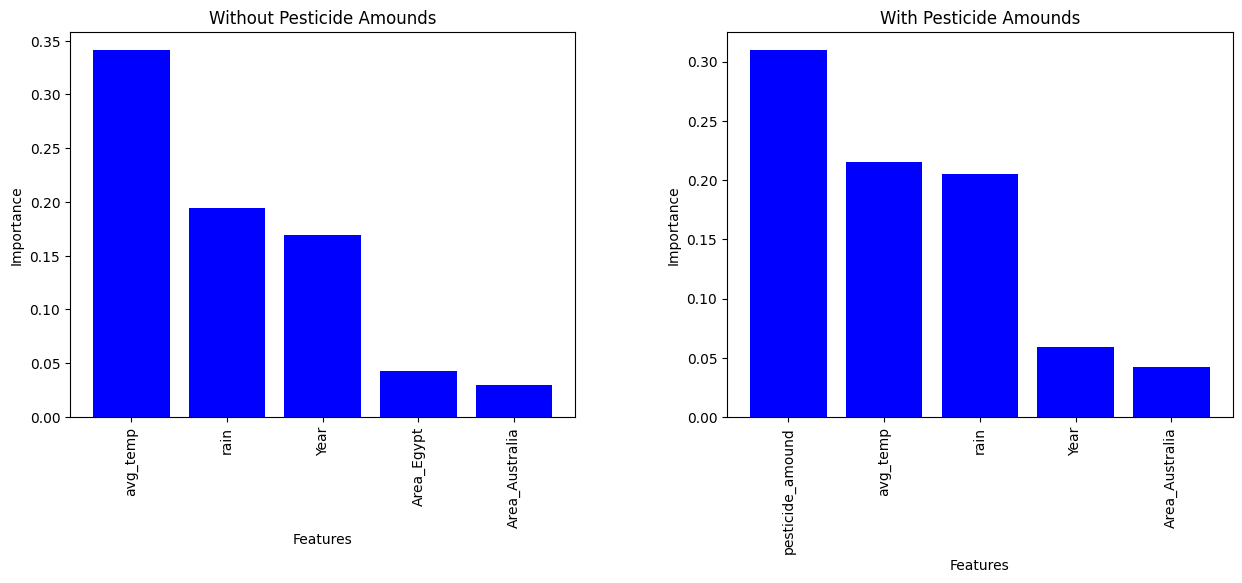

In [200]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

#fist plot
# Get feature importances
importances = model.feature_importances_

# Get feature names
feature_names = np.array(yield_df_onehot.drop("yield_amound", axis= 1).columns)

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
ax[0].bar(range(5), importances[indices][:5], color="b", align="center")
ax[0].set_xticks(range(5), feature_names[indices][:5], rotation=90)
ax[0].set_xlabel("Features")
ax[0].set_ylabel("Importance")
ax[0].set_title("Without Pesticide Amounds")
# Get feature importances
importances = model1.feature_importances_

# Get feature names
feature_names = np.array(yield_df_onehot1.drop("yield_amound", axis= 1).columns)

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
ax[1].bar(range(5), importances[indices][:5], color="b", align="center")
ax[1].set_xticks(range(5), feature_names[indices][:5], rotation=90)
ax[1].set_xlabel("Features")
ax[1].set_ylabel("Importance")
ax[1].set_title("With Pesticide Amounds")

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Show the plots
plt.show()

Judging from this visualisation of the feature importance, the pesticide amound seems really important for model building when the dataset has the information availeble. 

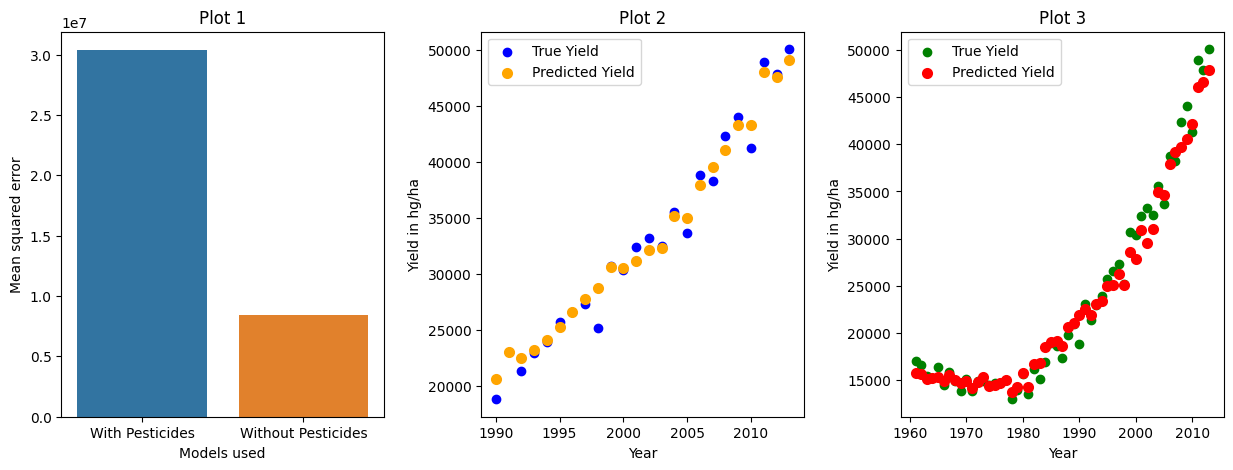

In [201]:
X_without["yield_org"] = y_without
X_without["yield_pred"] = y_pred_without
X_with["yield_org"] = y_with
X_with["yield_pred"] = y_pred_with
mse_with = mean_squared_error(X_with[X_with["Year"] >= 1990]["yield_org"] , X_with[X_with["Year"] >= 1990]["yield_pred"] )

mse_without_pesticides = mean_squared_error(X_without[X_without["Year"] >= 1990]["yield_org"] , X_without[X_without["Year"] >= 1990]["yield_pred"] )
di = pd.DataFrame({"model_type": ["With Pesticides", "Without Pesticides"], "MSE": [mse_with_pesticide,mse_without_pesticides]})

# First plot
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1
sns.barplot(data=di, y="MSE", x="model_type", ax=ax[0])
ax[0].set_xlabel("Models used")
ax[0].set_ylabel("Mean squared error")
ax[0].set_title("Plot 1")

# Plot 2
ax[1].scatter(X_with[X_with["Area_Brazil"] == True]["Year"], X_with[X_with["Area_Brazil"] == True]["yield_org"], color='blue', label="True Yield")
ax[1].scatter(X_with[X_with["Area_Brazil"] == True]["Year"], X_with[X_with["Area_Brazil"] == True]["yield_pred"], color='orange', label="Predicted Yield", linewidth=2)
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Yield in hg/ha")
ax[1].set_title("Plot 2")
ax[1].legend()

# Plot 3
ax[2].scatter(X_without[X_without["Area_Brazil"] == True]["Year"], X_without[X_without["Area_Brazil"] == True]["yield_org"], color='green', label="True Yield")
ax[2].scatter(X_without[X_without["Area_Brazil"] == True]["Year"], X_without[X_without["Area_Brazil"] == True]["yield_pred"], color='red', label="Predicted Yield", linewidth=2)
ax[2].set_xlabel("Year")
ax[2].set_ylabel("Yield in hg/ha")
ax[2].set_title("Plot 3")
ax[2].legend()

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Show the plots
plt.show()

But in as seen above in Plot 1, it does seem to achieve big a big performnce differnce. The Model without information about the pesticide amounds get a much lower mse. The mse is compareble here, because the same timeframe is used to calculate it. This means the timeframe is more important than the information about the pesticide amounds, and knowing that, the pesticide amounds wont be used anymore. 

In general we get quite good results for both models. Shown in Pots 2, with information about pesticides, and in Plot 3, without information about pesticides, the model give qite good predictions, here for brazil. 